# Tutorial 4: Generating Time-Series and Time-Series Survival data

__Time series__ prediction is a type of forecasting in which a model is trained on a sequence of historical data and then used to predict future values of that sequence. A time series is a sequence of data points collected at regular intervals over time, such as daily temperature measurements or weekly sales figures. Time series prediction is used in a wide range of applications, including finance, economics, engineering, and the physical sciences.

It's worth noting that Time series prediction is challenging because the future is often uncertain and can be affected by a wide range of unpredictable factors, therefore, evaluating the performance of the prediction model is crucial and various metrics such as mean squared error, mean absolute error, and root mean squared error are commonly used for this.

`synthcity` includes models targeting specific tabular modalities. One of the specific modalities is for __time series__. The general-purpose models can also be used for this task.

The main requirement of survival-analysis is to use a `TimeSeriesDataLoader`/`TimeSeriesSurvivalDataLoader` dataloader.

In [1]:
!pip install synthcity
!pip uninstall -y torchaudio torchdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torchtext to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is

Found existing installation: torchaudio 2.5.1+cu121
Uninstalling torchaudio-2.5.1+cu121:
  Successfully uninstalled torchaudio-2.5.1+cu121


In [1]:
# stdlib
import sys
import warnings

# synthcity absolute
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import TimeSeriesSurvivalDataLoader

log.add(sink=sys.stderr, level="INFO")
warnings.filterwarnings("ignore")

[KeOps] Compiling cuda jit compiler engine ... OK
[pyKeOps] Compiling nvrtc binder for python ... OK


In [2]:
import numpy as np
from synthcity.utils.datasets.time_series.pbc import PBCDataloader

(
    static_surv,
    temporal_surv,
    temporal_surv_horizons,
    outcome_surv,
) = PBCDataloader().load()
T, E = outcome_surv

horizons = [0.25, 0.5, 0.75]
time_horizons = np.quantile(T, horizons).tolist()

loader = TimeSeriesSurvivalDataLoader(
    temporal_data=temporal_surv,
    observation_times=temporal_surv_horizons,
    static_data=static_surv,
    T=T,
    E=E,
    time_horizons=time_horizons,
)

loader.dataframe()

,seq_id,seq_time_id,seq_static_sex,seq_temporal_SGOT,seq_temporal_age,seq_temporal_albumin,seq_temporal_alkaline,seq_temporal_ascites,seq_temporal_drug,seq_temporal_edema,seq_temporal_hepatomegaly,seq_temporal_histologic,seq_temporal_platelets,seq_temporal_prothrombin,seq_temporal_serBilir,seq_temporal_serChol,seq_temporal_spiders,seq_out_time_to_event,seq_out_event
0,0,0.569489,0.0,-1.485263,0.248058,-0.894575,0.195532,1.0,0.0,1.0,1.0,3.0,-0.529101,0.136768,3.281890,0.000000,1.0,0.569489,1.0
1,0,1.095170,0.0,0.195488,0.248058,-1.570646,0.285613,1.0,0.0,1.0,1.0,3.0,-0.456022,0.813132,2.015877,-0.469461,1.0,0.569489,1.0
2,1,5.319790,0.0,-0.442126,1.292856,-1.431455,-0.605844,1.0,0.0,1.0,1.0,2.0,-1.395605,0.339677,0.172710,-0.658914,1.0,14.152338,0.0
3,1,6.261636,0.0,-0.046806,1.292856,-1.172958,-0.512364,1.0,0.0,1.0,1.0,2.0,-1.259888,0.339677,-0.013468,-0.603657,1.0,14.152338,0.0
4,1,7.266455,0.0,0.293680,1.292856,-1.312149,-0.443529,1.0,0.0,1.0,1.0,2.0,-1.364286,0.339677,0.098239,0.000000,1.0,14.152338,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,311,1.045888,0.0,0.986129,-1.962482,0.059878,1.385274,0.0,1.0,2.0,0.0,2.0,-1.103291,1.624769,3.672865,3.319599,1.0,3.989158,0.0
1941,311,1.867265,0.0,0.641817,-1.962482,-0.099197,0.916176,0.0,1.0,2.0,0.0,1.0,-0.998892,1.354223,2.350998,2.901224,1.0,3.989158,0.0
1942,311,2.921367,0.0,0.552551,-1.962482,0.338261,0.327254,0.0,1.0,0.0,0.0,1.0,-0.894494,0.474950,0.694010,-0.066873,0.0,3.989158,0.0
1943,311,3.425145,0.0,0.016956,-1.962482,-0.377580,0.251620,0.0,1.0,0.0,0.0,1.0,-0.466462,-0.066141,0.340271,0.000000,0.0,3.989158,0.0


## List the available generative models

In [3]:
# synthcity absolute
from synthcity.plugins import Plugins

Plugins(categories=["generic", "time_series"]).list()

[2025-03-09T19:20:10.775681+0000][944][CRITICAL] module disabled: /usr/local/lib/python3.10/dist-packages/synthcity/plugins/generic/plugin_goggle.py
[2025-03-09T19:20:10.775681+0000][944][CRITICAL] module disabled: /usr/local/lib/python3.10/dist-packages/synthcity/plugins/generic/plugin_goggle.py


['timevae',
 'marginal_distributions',
 'arf',
 'rtvae',
 'dummy_sampler',
 'great',
 'nflow',
 'bayesian_network',
 'uniform_sampler',
 'tvae',
 'ddpm',
 'ctgan',
 'timegan',
 'fflows']

## Load and train a generative model

In [4]:
# synthcity absolute
from synthcity.plugins import Plugins

syn_model = Plugins().get("timegan")

syn_model.fit(loader)

[2025-03-09T19:20:14.924561+0000][944][CRITICAL] module disabled: /usr/local/lib/python3.10/dist-packages/synthcity/plugins/generic/plugin_goggle.py
[2025-03-09T19:20:16.116488+0000][944][CRITICAL] load failed: cannot import name 'computed_field' from 'pydantic' (/usr/local/lib/python3.10/dist-packages/pydantic/__init__.cpython-310-x86_64-linux-gnu.so)
[2025-03-09T19:20:16.118080+0000][944][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2025-03-09T19:20:16.120229+0000][944][CRITICAL] module plugin_decaf load failed
100%|██████████| 1000/1000 [10:57<00:00,  1.52it/s]


## Generate new data using the model

In [5]:
syn_model.generate(count=10).dataframe()

,seq_id,seq_time_id,seq_static_sex,seq_temporal_SGOT,seq_temporal_age,seq_temporal_albumin,seq_temporal_alkaline,seq_temporal_ascites,seq_temporal_drug,seq_temporal_edema,seq_temporal_hepatomegaly,seq_temporal_histologic,seq_temporal_platelets,seq_temporal_prothrombin,seq_temporal_serBilir,seq_temporal_serChol,seq_temporal_spiders,seq_out_time_to_event,seq_out_event
0,0,14.305662,0.0,1.176653,-1.435352,-0.406764,-0.280940,0.0,1.0,0.0,1.0,3.0,1.216199,0.256026,-0.516944,-0.557986,0.0,0.494564,0.0
1,0,14.305662,0.0,0.002023,-0.003353,0.000448,0.002542,0.0,0.0,0.0,0.0,0.0,0.002041,-0.000895,0.004686,0.001014,0.0,0.494564,0.0
2,1,14.305662,0.0,-0.382366,-1.435389,-0.406575,-0.280922,0.0,1.0,0.0,1.0,3.0,-1.230797,0.255962,-0.516875,-0.557716,0.0,9.055961,0.0
3,1,14.305662,0.0,0.002027,-0.003354,0.000448,0.002547,0.0,0.0,0.0,0.0,0.0,0.002035,-0.000892,0.004694,0.000998,0.0,9.055961,0.0
4,2,14.305662,0.0,-0.382312,-1.435352,-0.406764,-0.456890,0.0,0.0,0.0,0.0,3.0,1.216199,0.256026,-0.516944,-0.557986,0.0,0.494564,0.0
5,3,14.305662,0.0,-0.382312,-1.435352,-0.406764,-0.456890,0.0,1.0,0.0,1.0,3.0,-1.230761,0.256026,-0.516944,-0.557986,0.0,9.055961,0.0
6,3,14.305662,0.0,0.001924,-0.003002,-0.405315,0.004631,0.0,0.0,0.0,0.0,3.0,0.002579,-0.227443,-0.534427,0.000754,0.0,9.055961,0.0
7,3,14.305662,0.0,0.002023,-0.003353,0.000448,0.002542,0.0,0.0,0.0,0.0,0.0,0.002041,-0.000895,0.004686,0.001014,0.0,9.055961,0.0
8,4,14.305662,0.0,1.176653,-1.435351,-0.406763,-0.456889,0.0,0.0,0.0,1.0,3.0,-0.394310,0.256025,-0.516943,-0.557985,0.0,9.055961,0.0
9,4,14.305662,0.0,0.002023,-0.003353,0.000448,0.002542,0.0,0.0,0.0,0.0,0.0,0.002041,-0.000895,0.004686,0.001014,0.0,9.055961,0.0


## Plot real-synthetic distributions

Compared to the general case, the survival-analysis data includes KM plots for real and synthetic data.

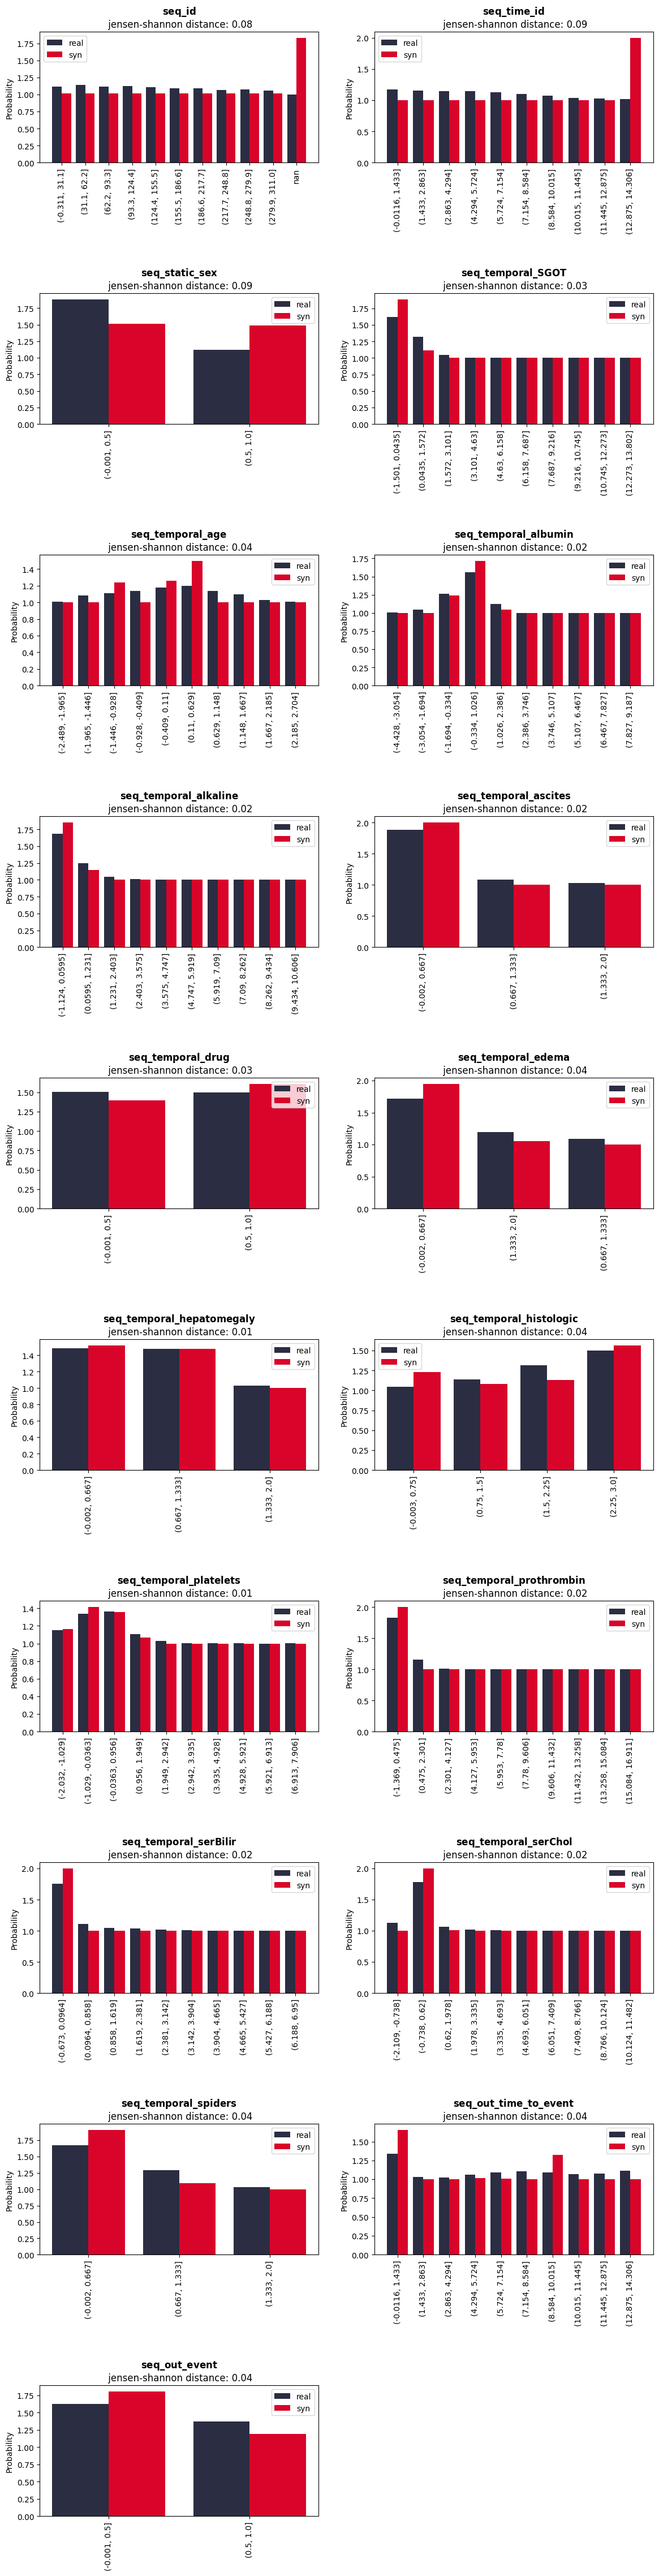

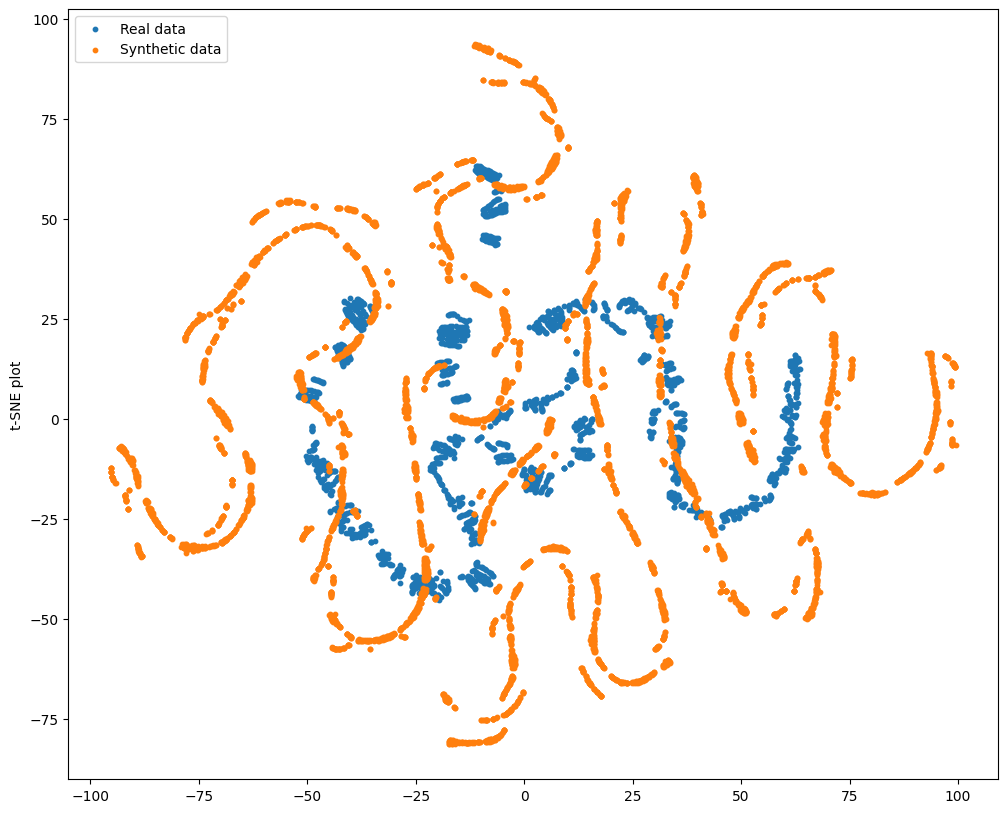

In [6]:
# third party
import matplotlib.pyplot as plt

syn_model.plot(plt, loader)

plt.show()

## Benchmarking metrics

| **Metric**                                         | **Description**                                                                                                            |
|----------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------|
| sanity.data\_mismatch.score                        | Data types mismatch between the real//synthetic features                                                                   |
| sanity.common\_rows\_proportion.score              | Real data copy-paste in the synthetic data                                                                                 |
| sanity.nearest\_syn\_neighbor\_distance.mean       | Computes the \textless{}reduction\textgreater{}(distance) from the real data to the closest neighbor in the synthetic data |
| sanity.close\_values\_probability.score            | the probability of close values between the real and synthetic data.                                                       |
| sanity.distant\_values\_probability.score          | the probability of distant values between the real and synthetic data.                                                     |
| stats.jensenshannon\_dist.marginal                 | the average Jensen-Shannon distance                                                                                        |
| stats.chi\_squared\_test.marginal                  | the one-way chi-square test.                                                                                               |
| stats.feature\_corr.joint                          | the correlation/strength-of-association of features in data-set with both categorical and continuous features              |
| stats.inv\_kl\_divergence.marginal                 | the average inverse of the Kullback–Leibler Divergence metric.                                                             |
| stats.ks\_test.marginal                            | the Kolmogorov-Smirnov test for goodness of fit.                                                                           |
| stats.max\_mean\_discrepancy.joint                 | Empirical maximum mean discrepancy. The lower the result the more evidence that distributions are the same.                |
| stats.prdc.precision                               | precision between the two manifolds                                                                                        |
| stats.prdc.recall                                  | recall between the two manifolds                                                                                           |
| stats.prdc.density                                 | density between the two manifolds                                                                                          |
| stats.prdc.coverage                                | coverage between the two manifolds                                                                                         |
| stats.alpha\_precision.delta\_precision\_alpha\_OC | Delta precision                                                                                                            |
| stats.alpha\_precision.delta\_coverage\_beta\_OC   | Delta coverage                                                                                                             |
| stats.alpha\_precision.authenticity\_OC            | Authetnticity                                                                                                              |
| stats.survival\_km\_distance.optimism              | Kaplan-Meier distance between real-synthetic data                                                                          |
| stats.survival\_km\_distance.abs\_optimism         | Kaplan-Meier metrics absolute distance between real-syn data                                                               |
| stats.survival\_km\_distance.sightedness           | Kaplan-Meier metrics distance on the temporal axis                                                                         |
| performance.linear\_model.gt.c\_index              | Train on real, test on the test real data using CoxPH: C-Index                                                             |
| performance.linear\_model.gt.brier\_score          | Train on real, test on the test real data using CoxPH: Brier score                                                         |
| performance.linear\_model.syn\_id.c\_index         | Train on synthetic, test on the train real data using CoxPH: C-Index                                                       |
| performance.linear\_model.syn\_id.brier\_score     | Train on synthetic, test on the train real data using CoxPH: Brier score                                                   |
| performance.linear\_model.syn\_ood.c\_index        | Train on synthetic, test on the test real data using CoxPH: C-Index                                                        |
| performance.linear\_model.syn\_ood.brier\_score    | Train on synthetic, test on the test real data using CoxPH: Brier score                                                    |
| performance.mlp.gt.c\_index                        | Train on real, test on the test real data using NN: C-Index                                                                |
| performance.mlp.gt.brier\_score                    | Train on real, test on the test real data using NN : Brier score                                                           |
| performance.mlp.syn\_id.c\_index                   | Train on synthetic, test on the train real data using NN: C-Index                                                          |
| performance.mlp.syn\_id.brier\_score               | Train on synthetic, test on the train real data using NN: Brier score                                                      |
| performance.mlp.syn\_ood.c\_index                  | Train on synthetic, test on the test real data using NN: C-Index                                                           |
| performance.mlp.syn\_ood.brier\_score              | Train on synthetic, test on the test real data using NN: Brier score                                                       |
| performance.xgb.gt.c\_index                        | Train on real, test on the test real data using XGB: C-Index                                                               |
| performance.xgb.gt.brier\_score                    | Train on real, test on the test real data using XGB : Brier score                                                          |
| performance.xgb.syn\_id.c\_index                   | Train on synthetic, test on the train real data using XGB: C-Index                                                         |
| performance.xgb.syn\_id.brier\_score               | Train on synthetic, test on the train real data using XGB: Brier score                                                     |
| performance.xgb.syn\_ood.c\_index                  | Train on synthetic, test on the test real data using XGB: C-Index                                                          |
| performance.xgb.syn\_ood.brier\_score              | Train on synthetic, test on the test real data using XGB: Brier score                                                      |
| performance.feat\_rank\_distance.corr              | Correlation for the rank distances between the feature importance on real and synthetic data                               |
| performance.feat\_rank\_distance.pvalue            | p-vale for the rank distances between the feature importance on real and synthetic data                                    |
| detection.detection\_xgb.mean                      | The average AUCROC score for detecting synthetic data using an XGBoost.                                                    |
| detection.detection\_mlp.mean                      | The average AUCROC score for detecting synthetic data using a NN.                                                          |
| detection.detection\_gmm.mean                      | The average AUCROC score for detecting synthetic data using a GMM.                                                         |
| privacy.delta-presence.score                       | the maximum re-identification probability on the real dataset from the synthetic dataset.                                  |
| privacy.k-anonymization.gt                         | the k-anon for the real data                                                                                               |
| privacy.k-anonymization.syn                        | the k-anon for the synthetic data                                                                                          |
| privacy.k-map.score                                | the minimum value k that satisfies the k-map rule.                                                                         |
| privacy.distinct l-diversity.gt                    | the l-diversity for the real data                                                                                          |
| privacy.distinct l-diversity.syn                   | the l-diversity for the synthetic data                                                                                     |
| privacy.identifiability\_score.score               | the re-identification score on the real dataset from the synthetic dataset.                                                |

## Benchmark the quality of plugins

For survival analysis, general purpose generators can be used as well.

In [7]:
# synthcity absolute
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [
        (f"test_{model}", model, {})
        for model in ["adsgan", "timegan"]
    ],
    loader,
    synthetic_size=1000,
    repeats=2,
    task_type="time_series_survival",  # time_series_survival or time_series
)

[2025-03-09T19:34:46.231496+0000][944][CRITICAL] module disabled: /usr/local/lib/python3.10/dist-packages/synthcity/plugins/generic/plugin_goggle.py
[2025-03-09T19:34:46.232966+0000][944][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2025-03-09T19:34:46.233940+0000][944][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2025-03-09T19:34:46.234807+0000][944][CRITICAL] module plugin_decaf load failed
  9%|▉         | 899/10000 [04:09<42:02,  3.61it/s]
[2025-03-09T19:44:57.244694+0000][944][CRITICAL] module disabled: /usr/local/lib/python3.10/dist-packages/synthcity/plugins/generic/plugin_goggle.py
[2025-03-09T19:44:57.247020+0000][944][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2025-03-09T19:44:57.248201+0000][944][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2025-03-09T19:44:57.2506

In [8]:
Benchmarks.print(score)


Comparatives


,test_adsgan,test_timegan
sanity.data_mismatch.score,0.0 +/- 0.0,0.0 +/- 0.0
sanity.common_rows_proportion.score,0.0 +/- 0.0,0.0 +/- 0.0
sanity.nearest_syn_neighbor_distance.mean,0.175 +/- 0.014,0.359 +/- 0.009
sanity.close_values_probability.score,0.676 +/- 0.054,0.218 +/- 0.004
sanity.distant_values_probability.score,0.004 +/- 0.001,0.007 +/- 0.0
stats.jensenshannon_dist.marginal,0.012 +/- 0.001,0.056 +/- 0.005
stats.chi_squared_test.marginal,0.726 +/- 0.052,0.067 +/- 0.013
stats.inv_kl_divergence.marginal,0.939 +/- 0.001,0.323 +/- 0.018
stats.ks_test.marginal,0.87 +/- 0.012,0.541 +/- 0.041
stats.max_mean_discrepancy.joint,0.004 +/- 0.001,0.004 +/- 0.001


## Congratulations!

Congratulations on completing this notebook tutorial! If you enjoyed this and would like to join the movement towards Machine learning and AI for medicine, you can do so in the following ways!

### Star [Synthcity](https://github.com/vanderschaarlab/synthcity) on GitHub

- The easiest way to help our community is just by starring the Repos! This helps raise awareness of the tools we're building.


### Checkout other projects from vanderschaarlab
- [HyperImpute](https://github.com/vanderschaarlab/hyperimpute)
- [AutoPrognosis](https://github.com/vanderschaarlab/autoprognosis)
